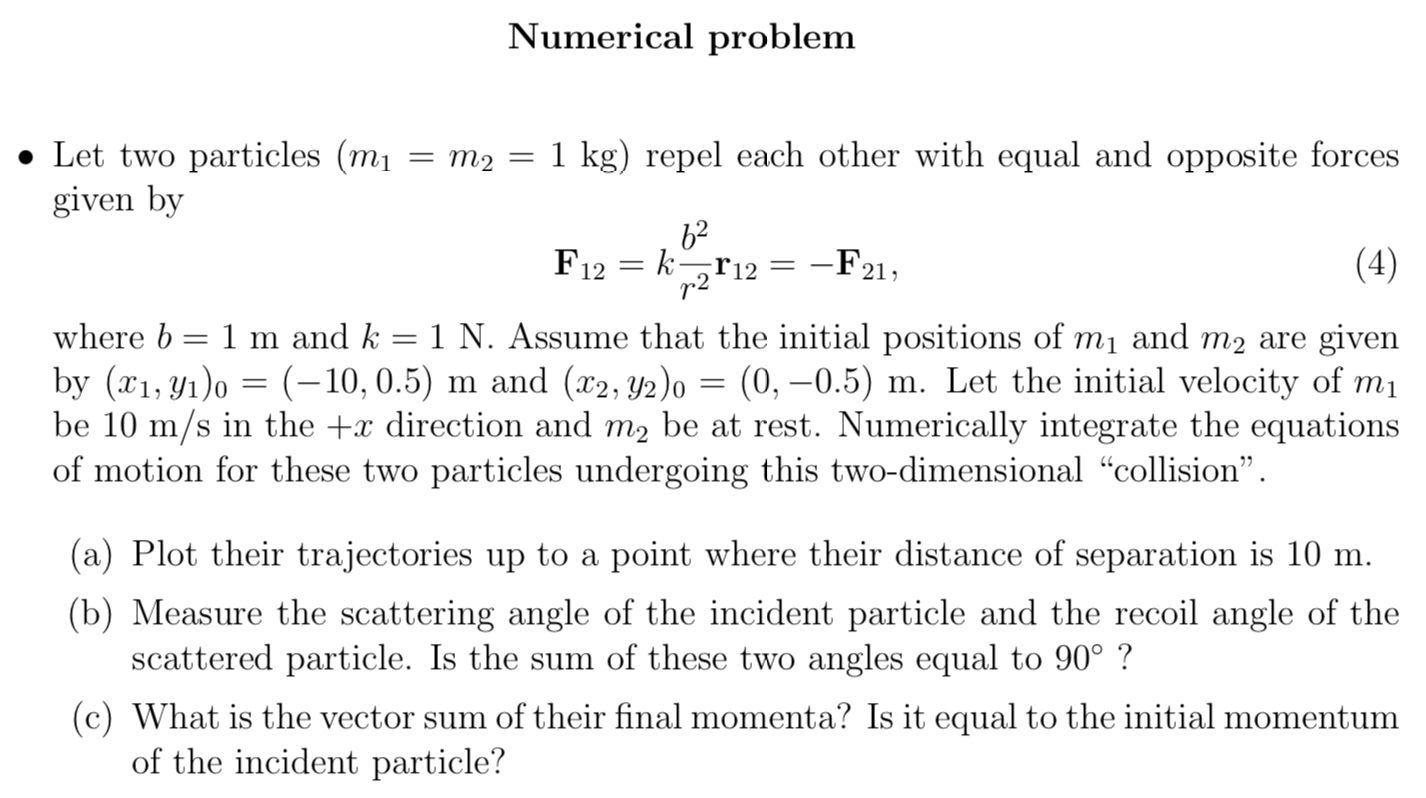

In [1]:
from IPython.display import Image
Image('./NA7.png', width=700, height=600)

In [2]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

rcParams['lines.linewidth'] = 2  # this makes plotted lines wider 

Populating the interactive namespace from numpy and matplotlib


In [3]:
# a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Initial Conditions

In [4]:
m1 = 1 # kg
m2 = 1 # kg 

x01 = -10 # m
y01 = 0.5 # m

x02 = 0 # m
y02 = -0.5 # m

v01_x = 10 #m/s in the x direction
v01_y = 0 # m

v02_x = 0 # m
v02_y = 0 # m

In [5]:
b  = 1 # m
k  = 1 # N

##  Equations of motion

$$\vec{F}_{12} = k \frac{b^2}{r^2} \hat{r}_{12} = - \vec{F}_{21} $$

$$\vec{r}_{12} = \vec{r}_1 - \vec{r}_2$$

$$r_{12} = \sqrt{ (x_1 - x_2)^2 + (y_1 - y_2)^2 } $$


$$\vec{F}_{12} = k \frac{b^2}{r^{3}} \vec{r}_{12} = - \vec{F}_{21} $$

From Newton's second law: F = ma 

For m1:
$$ \vec{F}_{12} = m_1 \ddot{\vec{r_1}}$$

For m2:
$$ \vec{F}_{21} = m_2 \ddot{\vec{r_2}}$$

Let:  
$z_1 = x_1$  
$z_3 = y_1$

Let   
$z_5 = x_2$  
$z_7 = y_2$ 


Therefore:
$$v1_x = \dot{x_1} = \dot{z_1} = z_2 $$
$$ a1_x = \ddot{x_1} = \dot{z_2} =  -\frac{(F_{21})_x}{m_1} $$   
 

$$v1_y = \dot{y_1} = \dot{z_3} = z_4 $$
$$ a1_y = \ddot{y_1} = \dot{z_4} =  -\frac{(F_{21})_y}{m_1} $$


$$v2_x = \dot{x_2} = \dot{z_5} = z_6 $$
$$ a2_x = \ddot{x_2} = \dot{z_6} =  \frac{(F_{21})_x}{m_2} $$   
 

$$v2_y = \dot{y_1} = \dot{z_7} = z_8 $$
$$ a2_y = \ddot{y_2} = \dot{z_8} =  \frac{(F_{21})_y}{m_2} $$

$$ (F_{21})_x = -\frac{k b^2}{(r_{21})^2 } \frac{ z_5 - z_1 }{ r_{21}}$$

$$ (F_{21})_y = -\frac{k b^2}{(r_{21})^2 } \frac{ z_7 - z_3 }{ r_{21}}$$

and $r_{21} = \sqrt{(z_5-z_1)^2+(z_7-z_3)^2}$.

# Part (a)

In [27]:
#RHS of the ODES
def dz_dt( z , t , k , b , m1 , m2):
    ''' 
    z = [ z1 , z3,      z5, z7 ,       z2 , z4,       z6 , z8 ]
    z = [ x1 , y1,      x2, y2 ,       v1_x , v1_y ,  v2_x , v2_y ]
    z = [(m1 location), (m2 location), (m1 velocity), (m2 velocity) ]
    
    dzdt = [ z2 ,   z_4,    z_6,   z_8  ,  a1_x , a1_y,  a2_x , a2_y ]
    dzdt = [ v1_x , v1_y ,  v2_x , v2_y ,  a1_x , a1_y,  a2_x , a2_y ]
    dzdt = [(m1 velocity), (m2 velocity), (m1 accelerat),(m2 accelerat) ]
    '''
    #unpacking 
    z1, z3, z5, z7, z2, z4, z6, z8 = z
    
    #Magnitude of the separation vector r21
    r21 = sqrt( (z5-z1)**2 + (z7-z3)**2 )
    
    #dont want to let r21 go to zero
    eps = 1e-6
    if r21 < eps:
        r21 = eps
    
    F = (k* b**2)/(r21**3)
    

    dzdt = [z2,z4,z6,z8,\
        F*(abs(z5-z1))/m1 , F*(abs(z7-z3))/m1, \
        -F*(abs(z5-z1))/m2 , -F*abs((z7-z1))/m2 ]
    
    return dzdt

In [28]:
z0 = [ x01 , y01, x02, y02 , v01_x , v01_y , v02_x , v02_y ]

In [29]:
from scipy.integrate import odeint

In [30]:
# the integration time interval
t_start = 0.
t_end = 5 # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

In [31]:
sol = odeint(dz_dt, z0, t, args=(k,b,m1,m2))
#columns of sol are the results of the differentiation
m1_x = sol[0:,0] #x position of mass 1 as a function of time
m1_y = sol[0:,1] #y position of mass 1 as a function of time
m2_x = sol[0:,2] #x position of mass 2 as a function of time
m2_y = sol[0:,3] #y position of mass 2 as a function of time

v1_x = sol[0:,4] #x velocity of mass 1 as a function of time
v1_y = sol[0:,5] #y velocity of mass 1 as a function of time
v2_x = sol[0:,6] #x velocity of mass 2 as a function of time
v2_y = sol[0:,7] #y velocity of mass 2 as a function of time

In [32]:
j = 4000
r = sqrt( (m2_x[j]-m1_x[j])**2 + (m2_y[j]-m2_x[j])**2 )
r
#The index of the solution where
#they are at a seperation of 10m again is 40

10.360721291343125

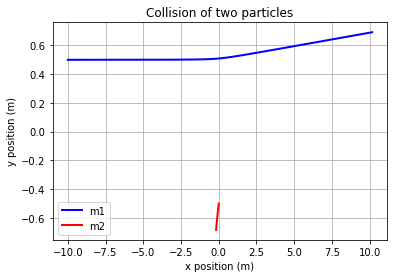

In [33]:
# plot Earth's orbit around the Sun
close(1);figure(1)
#figure(figsize=(14,7))
i = 4000
plot(m1_x[:i], m1_y[:i], 'b' , label='m1')
plot(m2_x[:i], m2_y[:i], 'r', label='m2')
xlabel('x position (m)')
ylabel('y position (m)')
title('Collision of two particles')
legend()
grid()
show()

# Part (b)

In [36]:
# M1 
nn = 10
tan_theta = (v1_y[-nn] -v1_y[0])/(v1_x[-nn] -v1_x[0])
theta = 180.*(arctan(tan_theta)/pi)
print ("Particle 1's deflection angle is {:.3f} degrees".format(theta))

# M2
nn = 10
tan_alpha = (v2_x[-nn] -v2_x[0])/(v2_y[-nn] -v2_y[0])
alpha = 180.*(arctan(tan_alpha)/pi)
print ("Particle 2's deflection angle is {:.3f} degrees".format(alpha))

print('The total deflection angle is {:.3f}'.format(theta+alpha))
print('The total deflection is very slightly less than 90 degrees')

Particle 1's deflection angle is 47.126 degrees
Particle 2's deflection angle is 42.004 degrees
The total deflection angle is 89.130
The total deflection is very slightly less than 90 degrees


# Part (c)

Momentum is given by:
$$p = m v $$

$$p_x = m v_x $$
$$p_y = m v_y $$

In [15]:
#Initial momentum
p01_x = m1 * v01_x
p01_y = m1 * v01_y

p02_x = m2 * v02_x
p02_y = m2 * v02_y

p0_x = p01_x + p02_x
p0_y = p01_y + p02_y
p0 = sqrt( p0_x**2 + p0_y**2 )

print('The inital momentum of the system is \
p = {:.3f} x̂ + {:.3f} ŷ kg m/s'.format(p0_x,p0_y))

print('The magnitude of the initial momentum is {:.5f} kg m/s'.format(p0))

The inital momentum of the system is p = 10.000 x̂ + 0.000 ŷ kg m/s
The magnitude of the initial momentum is 10.00000 kg m/s


In [16]:
#Final momentum
pf1_x = m1 * v1_x[-1]
pf1_y = m1 * v1_y[-1]

pf2_x = m2 * v2_x[-1]
pf2_y = m2 * v2_y[-1]

pf_x = pf1_x + pf2_x
pf_y = pf1_y + pf2_y
pf = sqrt( pf_x**2 + pf_y**2 )

print('The final momentum of the system is \
p = {:.3f} x̂ + {:.3f} ŷ kg m/s'.format(pf_x,pf_y))

print('The magnitude of the final momentum is {:.5f} kg m/s'.format(pf))

The final momentum of the system is p = 10.000 x̂ + -0.006 ŷ kg m/s
The magnitude of the final momentum is 10.00000 kg m/s


The final momentum is equal to the inital momentum